### Importação das bibliotecas necessárias:

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

### Importação do banco de dados:

In [5]:
data = pd.read_csv("College.csv")
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

### Conversão da coluna "*Private*" para valores numéricos:

In [7]:
data["Private"].replace(["Yes", "No"], [1,0], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 109.4 KB


In [9]:
x = data.drop(['Private'],axis=1)
y = data["Private"]
y.value_counts()

1    565
0    212
Name: Private, dtype: int64

O banco de dados é desbalanceado, possui mais casos do tipo "1" do que "0".

### Experimentos:

#### Para os experimentos serão utilizados os seguintes parâmetros da função "*KMeans*": *n_clusters, init, n_init, max_iter e random_state*.

*n_clusters*: Número de centróides que serão gerados. Padrão = 8.

*init*: Método para inicialização. Pode ser do tipo "*k_means++*", onde seleciona de maneira inteligente os centróides iniciais para acelerar a convergência, e do tipo "*random*", onde é escolhido aleatoriamente "*n_clusters*" linhas do banco de dados para serem os centróides iniciais. Padrão = "*k_means++*".

*n_init*: Número de vezes que o algoritmo K-Means executará com diferentes centróides iniciais. Padrão = 10.

*max_iter*: Número máximo de iterações que o algoritmo K-Means irá executar. Padrão = 300.

*random_state*: Número aleatório para geração inicial dos centróides. Padrão = *None*.

#### Para os experimentos também serão utilizados os seguintes parâmetros da função "*train_test_split*": *train_size* e *random_state*.

*train_size*: Representa a porcentagem do banco de dados utilizada para treinamento, o restante fica alocado para teste. Padrão: *None*.

*random_state*: Número para aleatorizar as observações selecionadas do banco de dados *x* e *y*. Padrão: *None*.

#### Variando *train_size*:

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.50, random_state=None)
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.012853470437017995
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.13      0.02      0.03       292
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.01       389
   macro avg       0.02      0.00      0.00       389
weighted avg       0.10      0.01      0.02       389



C:\Users\nicho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarni

Obtiveram-se esses *warnings* pois como foi passado *n_clusters=8*, o algoritmo "*KMeans*" tentará segregar o banco de dados que o foi passado em 8 diferentes classificações, entretanto o banco de dados utilizado possui apenas 2 classificações, "1" para faculadade privada e "0" para faculdade pública, logo, deve-se utilizar *n_clusters=2* para os experimentos.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.50, random_state=None)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.2236503856041131
              precision    recall  f1-score   support

           0       0.21      0.72      0.33       102
           1       0.33      0.05      0.08       287

    accuracy                           0.22       389
   macro avg       0.27      0.38      0.21       389
weighted avg       0.30      0.22      0.15       389



In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=None)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.1639871382636656
              precision    recall  f1-score   support

           0       0.17      0.62      0.27        76
           1       0.12      0.02      0.03       235

    accuracy                           0.16       311
   macro avg       0.15      0.32      0.15       311
weighted avg       0.13      0.16      0.09       311



In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=None)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.7589743589743589
              precision    recall  f1-score   support

           0       0.73      0.28      0.41        57
           1       0.76      0.96      0.85       138

    accuracy                           0.76       195
   macro avg       0.75      0.62      0.63       195
weighted avg       0.75      0.76      0.72       195



*train_size=0.75* apresentou o melhor resultado.

#### Variando *random_state* de *train_test_split*:

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8051282051282052
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        53
           1       0.81      0.96      0.88       142

    accuracy                           0.81       195
   macro avg       0.80      0.67      0.70       195
weighted avg       0.80      0.81      0.78       195



In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=1)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.7692307692307693
              precision    recall  f1-score   support

           0       0.62      0.29      0.40        51
           1       0.79      0.94      0.86       144

    accuracy                           0.77       195
   macro avg       0.71      0.62      0.63       195
weighted avg       0.75      0.77      0.74       195



In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=15)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.22564102564102564
              precision    recall  f1-score   support

           0       0.22      0.62      0.32        58
           1       0.27      0.06      0.10       137

    accuracy                           0.23       195
   macro avg       0.24      0.34      0.21       195
weighted avg       0.25      0.23      0.16       195



In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.21025641025641026
              precision    recall  f1-score   support

           0       0.21      0.59      0.31        58
           1       0.23      0.05      0.08       137

    accuracy                           0.21       195
   macro avg       0.22      0.32      0.19       195
weighted avg       0.22      0.21      0.15       195



O *random_state=0* apresentou os melhores resultados.

#### Variando *init*:

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="random", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8051282051282052
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        53
           1       0.81      0.96      0.88       142

    accuracy                           0.81       195
   macro avg       0.80      0.67      0.70       195
weighted avg       0.80      0.81      0.78       195



Obtiveram-se os mesmos resultados.

#### Variando *n_init*:

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=5, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8051282051282052
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        53
           1       0.81      0.96      0.88       142

    accuracy                           0.81       195
   macro avg       0.80      0.67      0.70       195
weighted avg       0.80      0.81      0.78       195



In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=15, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8051282051282052
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        53
           1       0.81      0.96      0.88       142

    accuracy                           0.81       195
   macro avg       0.80      0.67      0.70       195
weighted avg       0.80      0.81      0.78       195



A alteração de *n_init* não proporcionou uma melhora no resultado.

#### Variando *max_iter*:

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=50, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8051282051282052
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        53
           1       0.81      0.96      0.88       142

    accuracy                           0.81       195
   macro avg       0.80      0.67      0.70       195
weighted avg       0.80      0.81      0.78       195



In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=100, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8051282051282052
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        53
           1       0.81      0.96      0.88       142

    accuracy                           0.81       195
   macro avg       0.80      0.67      0.70       195
weighted avg       0.80      0.81      0.78       195



In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=400, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=500, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



Um aumento no valor de *max_iter* resultou em uma piora dos resultados.

#### Variando *random_state* da função "*KMeans*":

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = 0)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = 1)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = 15)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = 42)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



Os resultados de *random_state=None* apresentaram-se os melhores entre os testados. O valor *None* significa que será usado a instância de estado aleatório global de *numpy.random*.

Portanto, os melhores resultados foram obtidos quando foram utilizados os parâmetros: *train_size=0.75*, *random_state* de *train_test_split* igual a 0 e *n_clusters=2*, *init=k-means++*, *n_init=10*, *max_iter=300* e *random_state* de *KMeans* igual a *None*.

### Tenta-se agora descobrir quais são as melhores variáveis para utilizar no banco de dados para tentar maximizar os resultados.

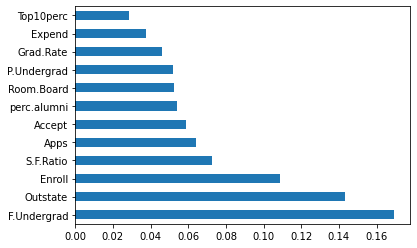

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### Irão ser utilizados somente as colunas "*F.Undergrad*", "*Outstate*" e "*Enroll*".

In [64]:
data2 = pd.read_csv("College.csv")
data2.drop(["Unnamed: 0", "Top10perc", "Expend", "Grad.Rate", "P.Undergrad", "Room.Board", "perc.alumni", "Accept", "Apps", "S.F.Ratio"], axis=1, inplace=True)
data2["Private"].replace(["Yes", "No"], [1,0], inplace=True)
x2 = data.drop(['Private'],axis=1)
y2 = data["Private"]

### Realiza-se o experimento com os melhores parâmetros que foram obtidos anteriormente:

In [65]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.75, random_state=0)
kmeans2 = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans2.fit(x2_train)
predicted2 = kmeans.predict(x2_test)
print(accuracy_score(y2_test, predicted2))
print(classification_report(y2_test,predicted2))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



Infelizmente com esse novo banco de dados não foi possível melhorar os resultados.